In [48]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
from pycaret.classification import *
from ydata_profiling import ProfileReport
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [3]:
# nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/canxiuzhang/nltk_data...


True

In [29]:
df_train = pd.read_csv('dataset/Corona_NLP_train.csv', encoding='latin-1')
df_test = pd.read_csv('dataset/Corona_NLP_test.csv', encoding='latin-1')

In [42]:
profile_train = ProfileReport(df_train)
profile_train.to_file("data_train_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [43]:
profile_test = ProfileReport(df_test)
profile_test.to_file("data_test_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [56]:
df_train['cleaned_tweet'] = df_train.apply(lambda row: row['OriginalTweet'].replace('amp', ''), axis=1)
df_test['cleaned_tweet'] = df_test.apply(lambda row: row['OriginalTweet'].replace('amp', ''), axis=1)

In [58]:
scores = sia.polarity_scores(df_train['cleaned_tweet'][0])

In [59]:
scores

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [60]:
df_train['Sentiment'][0]

'Neutral'

In [61]:
df_train['neg'] = df_train.apply(lambda row: sia.polarity_scores(row['cleaned_tweet'])['neg'],axis=1)
df_train['neu'] = df_train.apply(lambda row: sia.polarity_scores(row['cleaned_tweet'])['neu'],axis=1)
df_train['pos'] = df_train.apply(lambda row: sia.polarity_scores(row['cleaned_tweet'])['pos'],axis=1)
df_train['compound'] = df_train.apply(lambda row: sia.polarity_scores(row['cleaned_tweet'])['compound'],axis=1)

KeyboardInterrupt: 

In [ ]:
df_test['neg'] = df_test.apply(lambda row: sia.polarity_scores(row['cleaned_tweet'])['neg'],axis=1)
df_test['neu'] = df_test.apply(lambda row: sia.polarity_scores(row['cleaned_tweet'])['neu'],axis=1)
df_test['pos'] = df_test.apply(lambda row: sia.polarity_scores(row['cleaned_tweet'])['pos'],axis=1)
df_test['compound'] = df_test.apply(lambda row: sia.polarity_scores(row['cleaned_tweet'])['compound'],axis=1)

In [32]:
df_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,neg,neu,pos,compound
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0.000,1.000,0.000,0.0000
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,0.000,0.923,0.077,0.2500
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,0.000,0.812,0.188,0.4588
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,0.000,0.777,0.223,0.8731
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,0.079,0.713,0.208,0.7161


In [33]:
df_test.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,neg,neu,pos,compound
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,0.076,0.924,0.000,-0.2023
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,0.099,0.901,0.000,-0.4133
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive,0.000,0.606,0.394,0.7579
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,0.054,0.946,0.000,-0.2500
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,0.000,1.000,0.000,0.0000


In [34]:
exp_name = setup(data = df_train,  
                 target = 'Sentiment',
                train_size = 0.8,
                fold_strategy = 'kfold',
                ignore_features=['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet'])

,Description,Value
0,session_id,2401
1,Target,Sentiment
2,Target Type,Multiclass
3,Label Encoded,"Extremely Negative: 0, Extremely Positive: 1, Negative: 2, Neutral: 3, Positive: 4"
4,Original Data,"(41157, 10)"
5,Missing Values,True
6,Numeric Features,4
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [35]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9343,0.9773,0.9364,0.9344,0.9343,0.9165,0.9165,9.0310
lightgbm,Light Gradient Boosting Machine,0.9320,0.9766,0.9342,0.9321,0.9319,0.9135,0.9136,1.1060
knn,K Neighbors Classifier,0.9263,0.9625,0.9287,0.9264,0.9262,0.9063,0.9063,0.2110
rf,Random Forest Classifier,0.9263,0.9709,0.9288,0.9263,0.9262,0.9063,0.9063,2.0550
ada,Ada Boost Classifier,0.9233,0.8688,0.9241,0.9235,0.9232,0.9024,0.9025,0.6440
et,Extra Trees Classifier,0.9180,0.9677,0.9205,0.9180,0.9179,0.8957,0.8957,1.2200
lr,Logistic Regression,0.9005,0.9707,0.9045,0.9008,0.9005,0.8735,0.8735,2.2850
dt,Decision Tree Classifier,0.8976,0.9298,0.9013,0.8975,0.8974,0.8698,0.8699,0.0760
qda,Quadratic Discriminant Analysis,0.8759,0.9666,0.8847,0.8773,0.8756,0.8426,0.8431,0.0280
lda,Linear Discriminant Analysis,0.8555,0.9684,0.8659,0.8589,0.8550,0.8171,0.8182,0.0340


In [36]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9326,0.9776,0.9345,0.9326,0.9326,0.9143,0.9143
1,0.9347,0.9781,0.9342,0.9351,0.9346,0.9171,0.9172
2,0.9408,0.9794,0.9429,0.9408,0.9408,0.9249,0.9249
3,0.9371,0.9792,0.9363,0.9372,0.9371,0.9201,0.9201
4,0.9311,0.9762,0.9343,0.9310,0.9310,0.9122,0.9122
5,0.9326,0.9759,0.9363,0.9326,0.9325,0.9142,0.9143
6,0.9304,0.9749,0.9318,0.9305,0.9304,0.9111,0.9111
7,0.9389,0.9795,0.9431,0.9391,0.9388,0.9223,0.9224
8,0.9335,0.9775,0.9364,0.9335,0.9334,0.9155,0.9155


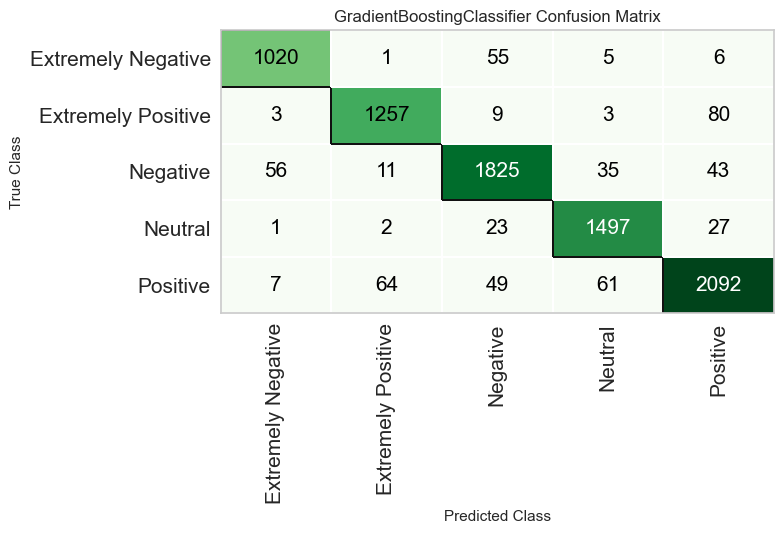

In [37]:
plot_model(gbc, plot = 'confusion_matrix')

In [39]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9302,0.9768,0.9324,0.9303,0.9301,0.9112,0.9112
1,0.9344,0.9774,0.9331,0.9348,0.9343,0.9167,0.9168
2,0.9377,0.9776,0.9396,0.9378,0.9377,0.9210,0.9210
3,0.9353,0.9794,0.9354,0.9353,0.9353,0.9178,0.9178
4,0.9308,0.9751,0.9346,0.9308,0.9307,0.9119,0.9119
5,0.9301,0.9743,0.9342,0.9301,0.9300,0.9112,0.9112
6,0.9265,0.9751,0.9282,0.9265,0.9264,0.9061,0.9061
7,0.9371,0.9781,0.9413,0.9373,0.9370,0.9200,0.9201
8,0.9301,0.9766,0.9330,0.9302,0.9300,0.9112,0.9113


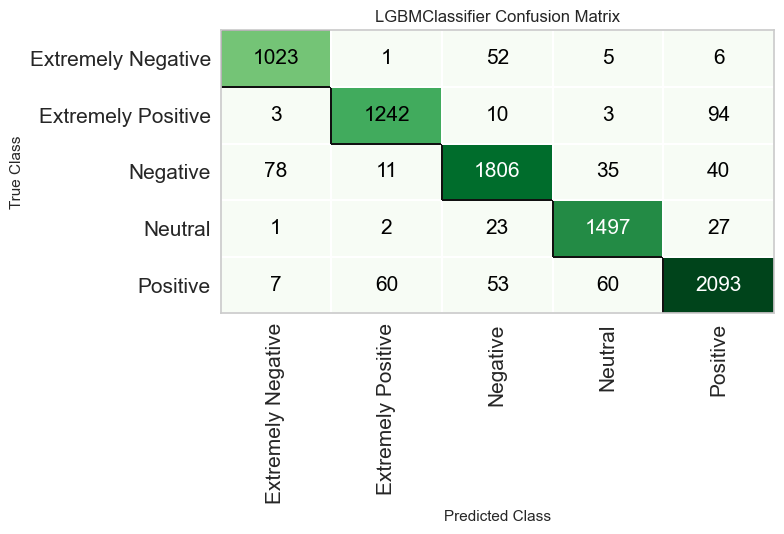

In [44]:
plot_model(lightgbm, plot = 'confusion_matrix')

In [45]:
df_test.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,neg,neu,pos,compound
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,0.076,0.924,0.000,-0.2023
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,0.099,0.901,0.000,-0.4133
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive,0.000,0.606,0.394,0.7579
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,0.054,0.946,0.000,-0.2500
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,0.000,1.000,0.000,0.0000


In [52]:
pred_unseen = predict_model(gbc, data = df_test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.0000,0.9620,0,0,0,0,0


0.8991574512901527

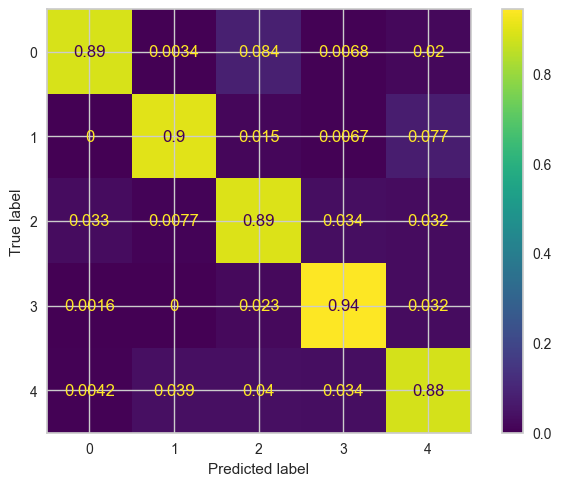

In [53]:
cm = confusion_matrix(pred_unseen["Sentiment"], pred_unseen["Label"], normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
accuracy_score(pred_unseen["Sentiment"], pred_unseen["Label"])